In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics, tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  

In [2]:
dsPuro = pd.read_csv('dadosPorLabMean.csv')
dsFiltrado = pd.read_csv('dadosPorLabMeanFiltrado.csv')

In [3]:
dsFiltrado[['Duracao', 'Qntd_Linhas','Qntd_Linhas_Filtrado','Testes','Submissoes','PP_Paste','PP_Delete','Linhas_Log']] = dsFiltrado[['Duracao', 'Qntd_Linhas','Qntd_Linhas_Filtrado','Testes','Submissoes','PP_Paste','PP_Delete','Linhas_Log']].astype(int)

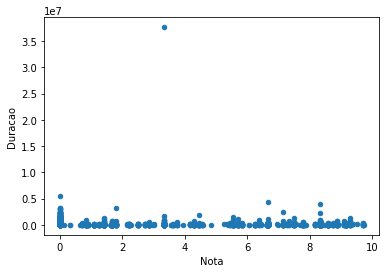

In [4]:
dsPuro.plot(kind='scatter', y='Duracao', x='Nota')

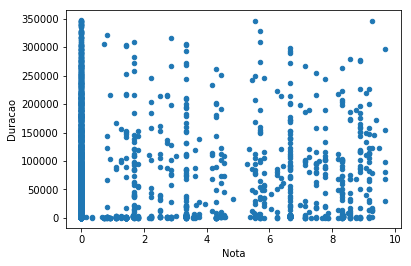

In [5]:
dsFiltrado.plot(kind='scatter', y='Duracao', x='Nota')

In [6]:
dsFiltrado[dsFiltrado['Nota']>5].count()

Duracao                 425
Qntd_Linhas             425
Qntd_Linhas_Filtrado    425
Testes                  425
Submissoes              425
PP_Paste                425
PP_Delete               425
Linhas_Log              425
Nota                    425
dtype: int64

## Engenharia de atributos

In [7]:
for index, row in dsFiltrado.iterrows():
    if(row['Nota'] >= 5.0):
        dsFiltrado.replace(row['Nota'], '1',inplace=True)
    else:
        dsFiltrado.replace(row['Nota'], '0',inplace=True)

dsFiltrado[['Nota']] = dsFiltrado[['Nota']].astype(int)

In [8]:
dsFiltrado[dsFiltrado['Nota'] != 0].count()

Duracao                 425
Qntd_Linhas             425
Qntd_Linhas_Filtrado    425
Testes                  425
Submissoes              425
PP_Paste                425
PP_Delete               425
Linhas_Log              425
Nota                    425
dtype: int64

In [9]:
SemNota = list(dsFiltrado.columns.values)
SemNota.remove('Nota')
print(SemNota)

['Duracao', 'Qntd_Linhas', 'Qntd_Linhas_Filtrado', 'Testes', 'Submissoes', 'PP_Paste', 'PP_Delete', 'Linhas_Log']


In [10]:
X = dsFiltrado[SemNota].values
y = dsFiltrado['Nota'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Árvore de Decisão

In [12]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [13]:
clf_gini.score(X_test, y_test) 

0.9330708661417323

In [14]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [15]:
clf_entropy.score(X_test, y_test) 

0.9330708661417323

## Random Forest

In [16]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
clf.fit(X_train, y_train)

/home/linuxArtu/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
clf.score(X_test, y_test) 

0.9330708661417323

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[474,   0],
       [ 34,   0]])

## KNN

In [20]:
#Fazendo com 9 vizinhos proximos
neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test) 

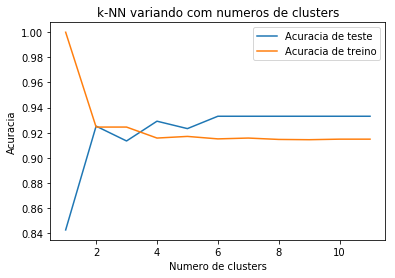

In [21]:
#Generate plot
plt.title('k-NN variando com numeros de clusters')
plt.plot(neighbors, test_accuracy, label='Acuracia de teste')
plt.plot(neighbors, train_accuracy, label='Acuracia de treino')
plt.legend()
plt.xlabel('Numero de clusters')
plt.ylabel('Acuracia')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [23]:
knn.score(X_test,y_test)

0.9330708661417323

In [24]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[474,   0],
       [ 34,   0]])

## SVM

In [25]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

/home/linuxArtu/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
svclassifier.score(X_test,y_test)

0.9330708661417323

In [27]:
y_pred = svclassifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[474,   0],
       [ 34,   0]])